# Praca domowa nr 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("allegro-api-transactions.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

Na szczęście braku nulli :)

In [4]:
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [5]:
df[df['it_location'].str.startswith('warszawa')].it_location.value_counts()

warszawa                   1123
warszawa, łódź               11
warszawa białołęka            2
warszawa                      2
warszawa, ŁÓDŹ                2
warszawa, radom, polska       1
warszawa / WOŁOMIN            1
Name: it_location, dtype: int64

In [6]:
df[df['it_location'].str.startswith('Warszawa')].it_location.value_counts()

Warszawa                              23244
Warszawa/ Sprzedaż tylko wysyłkowa      333
Warszawa, Katowice                      146
Warszawa-Halinów                        123
Warszawa OCHOTA                          85
                                      ...  
Warszawa/ RASZYN                          1
Warszawa CENTRUM                          1
Warszawa,Stare Babice                     1
Warszawa Tłuszcz                          1
Warszawa Jana Pawła II 9                  1
Name: it_location, Length: 202, dtype: int64

Wszystkie nazwy miast można sprowadzić do małych liter - dzięki temu unikniemy kilku powtórzeń. Jednak, ta operacja i tak i tak nie wyeliminuje wszystkich powtórzeń spowodowanych błędnym wpisaniem lokalizacji (w przypadku Warszawy mamy ponad 200 możliwości). Nadal zostaną rekordy z wpisanymi kilkoma miastami (np. *warszawa, łódź*) oraz konkretnymi adresami (np. *Warszawa ul.Łopuszańska 38 bud C*) lub innymi dodatkami, jak *Łódź, tylko wysyłka z magazynu*  czy *Łódź, wysyłka na całą Polskę*.



In [7]:
df[df['it_location'].str.startswith('Łódź')].it_location.value_counts()

Łódź                                   10935
Łódź - Zduńska Wola - Sieradz             81
Łódź lub Konstantynów Łódzki              78
Łódź, Batalionów Chłopskich 10            19
Łódź, Tomaszów Mazowiecki                 19
Łódź                                      17
Łódź ul. Gdańska 126                      16
Łódź, wysyłka na całą Polskę              14
Łódź, Andrespol                           14
Łódź ( Piłsudskiego 92 )                  13
Łódź, Pomorska 41                         12
Łódź, ul. Pomorska 100                    11
Łódź, ul. Inflancka 65                     8
Łódź, hala Bałucki Rynek, box 128          8
Łódź, Gdańska 126                          8
Łódź, Drewnowska 77                        7
Łódź/Pabianice/Łask                        7
Łódź, ul. Zgierska 69                      7
Łódź / Pabianice / Janowice                5
Łódź, Piotrkowska 49                       5
Łódź,ul.Próchnika 13                       4
Łódź ul. Piłsudskiego 45                   4
Łódź - Lut

Można by było przypisać pierwsze słowo (lub słowa w przypadku miast o nazwach dwuczłonowych, np. Aleksandrów Łódzki i Aleksandrów Kujawski) jako adres, jednak najpierw potrzebna by była lista wszystkich poprawnych nazw miast, aby np. Aleksandrów Łódzki i Aleksandrów Kujawski nie stały się jednym miastem. Wtedy można by było również wyeliminować literówki, takie jak *Łódź* i *Lodz*.

In [8]:
df[df['it_location'].str.startswith('Lodz')].it_location.value_counts()

Lodz    45
Name: it_location, dtype: int64

In [9]:
df[df['it_location'].str.startswith('Aleksandrów')].it_location.value_counts()

Aleksandrów Łódzki      133
Aleksandrów Kujawski     29
Aleksandrów              11
Aleksandrów łódzki        7
Aleksandrów               4
Aleksandrów kujawski      1
Aleksandrów Ł.            1
Name: it_location, dtype: int64

In [10]:
df['it_location'] = df['it_location'].str.lower()

## Target encoding dla zmiennej it_location

Link do animacji pokazującej zasadę działania target encodingu: https://brendanhasz.github.io/2019/03/04/target-encoding#target-encoding

In [11]:
import category_encoders as ce

dfX = df.copy()
encoder = ce.TargetEncoder(cols = 'it_location')

dfX['it_location'] = dfX['it_location'].str.lower()

dfX['it_location'] = encoder.fit_transform(dfX['it_location'], dfX['price'])
dfX.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,64.883187,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"


Zalety: 
* kodowanie nie zwiększa wymiaru ramki danych - w tym przypadku przy zastosowaniu klasycznego One Hot Encoding dostalibyśmy ramkę danych o ponad 10000 kolumnach

Wady:
* zależny od rozkładu targetu dla danej kategorii - może prowadzić do przeuczenia, bo w zbiorze testowym/walidacyjnym dana kategoria może mieć inny rozkład
* w kategoriach, w których mamy mało obserwacji, średnia nie będzie dobrym parametrem - duże ryzyko przeuczenia
* może być niejednoznaczne - w szczególności w przypadku dużej liczby różnych klas - tracimy informacje o kategoriach, które są jakby grupowane według średniej: tak jak w tym przykładzie:

In [12]:
print(f"Liczba unikalnych, pierwotnych wartości it_location: {df.it_location.nunique()}")
print(f"Liczba unikalnych, zakodowanych wartości it_location: {dfX.it_location.nunique()}")

Liczba unikalnych, pierwotnych wartości it_location: 7903
Liczba unikalnych, zakodowanych wartości it_location: 5142


## Encoding dla main_category

### 1. One Hot Encoder

Link do animacji pokazującej zasadę działania one hot encodingu: https://brendanhasz.github.io/2019/03/04/target-encoding#one-hot-encoding

In [13]:
dfX = df.copy()
dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,"Odzież, Obuwie, Dodatki"


In [14]:
enc = ce.OneHotEncoder(cols="main_category", use_cat_names=True)
dfX = enc.fit_transform(dfX)

dfX.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0


### 2. Leave One Out Encoding

Link do animacji pokazującej zasadę działania leave one out encodingu: https://brendanhasz.github.io/2019/03/04/target-encoding#leave-one-out-target-encoding

Działa podobnie do target encodingu, jednak przy wyliczniu średniej omija wartość targetu dla liczonego wiersza - dzięki temu redukuje wpływ outlierów.

In [15]:
dfX = df.copy()
dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,"Odzież, Obuwie, Dodatki"


In [16]:
encoder = ce.LeaveOneOutEncoder()
dfX['main_category'] = encoder.fit_transform(dfX['main_category'], dfX['price'])

dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,121.814331
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,75.859357
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,72.434342
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,25.028061
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,75.859080


### 3. James-Stein Encoder

Podobny do target encodingu, tylko że tutaj stosowany jest wzór na średnią ważoną:

$JS_{i} = (1-B)*mean(y_i) + B*mean(y)$

gdzie $mean(y_i)$ oznacza średnią wartość targetu, kiedy zmienna kodowana ma wartość $i$, natomiast $B$ to współczynnik regulujący, aby kodowanie było mnie zależne od rozkładu tageta

In [17]:
dfX = df.copy()

js = ce.JamesSteinEncoder(dfX, cols = 'main_category')
dfX = js.fit_transform(dfX, dfX['price'])
dfX.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,101.735793
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,75.894257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,73.179117
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,25.346202
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,75.894257


W tym przypadku kodowanie jest jednoznaczne:

In [18]:
print(f"Liczba unikalnych wartości main_category po zakodowaniu: {dfX.main_category.nunique()}")
print(f"Liczba unikalnych wartości main_category w oryginale: {df.main_category.nunique()}")

Liczba unikalnych wartości main_category po zakodowaniu: 27
Liczba unikalnych wartości main_category w oryginale: 27


## Uzupełnianie braków

In [19]:
dfX = df[['price', 'it_seller_rating', 'it_quantity']].copy()
dfX.head()

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950


In [20]:
dfX = dfX.head(50000).copy()
dfX.shape

(50000, 3)

### Jedna kolumna

In [21]:
def insert_nans_and_impute_one_column(dfX, return_out_df):
    dfXX = dfX.copy()
    dfXX.loc[dfXX.sample(frac = 0.1).index, 'it_seller_rating'] = np.nan
    
    from sklearn.impute import KNNImputer
    
    imputer = KNNImputer(n_neighbors=5, weights= "distance")
    out = imputer.fit_transform(dfXX)

    from sklearn.metrics import mean_squared_error
    
    vec = dfXX.it_seller_rating.isna()

    rms = mean_squared_error(dfX['it_seller_rating'][vec], out[vec, 1], squared=False)
    
    if not return_out_df:
        return rms
    else:
        y_actual = dfX.loc[vec.to_numpy(), 'it_seller_rating'].to_numpy()
        y_predicted = out[vec, 1]
        
        return rms, y_actual, y_predicted 

In [22]:
# pojedyncza próba

insert_nans_and_impute_one_column(dfX, False)

31540.33909039301

In [23]:
dfX

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950
...,...,...,...
49995,6.99,5038,1
49996,30.00,179,0
49997,2.50,104069,0
49998,44.00,554,0


In [24]:
# pojedyncza próba wraz z wektorami

rms, y_actual, y_predicted = insert_nans_and_impute_one_column(dfX, True)

In [25]:
y_actual_df = pd.DataFrame(y_actual)
y_actual_df.columns = ['y']

y_actual_df['type'] = 'actual'

In [26]:
y_predicted_df = pd.DataFrame(y_predicted)
y_predicted_df.columns = ['y']

y_predicted_df['type'] = 'predicted'

In [27]:
X = pd.concat([y_actual_df, y_predicted_df])
X.head()

,y,type
0,39371.0,actual
1,5403.0,actual
2,15561.0,actual
3,5235.0,actual
4,16454.0,actual


Porównanie rozkładów danych, które zostały usunięte oraz danych imputowanych

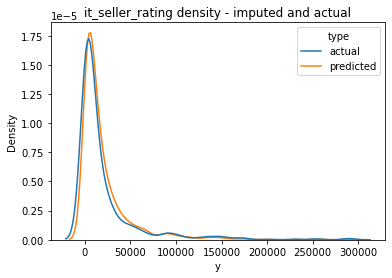

In [28]:
sns.kdeplot(data=X, x="y", hue="type")
plt.title('it_seller_rating density - imputed and actual')

plt.show()

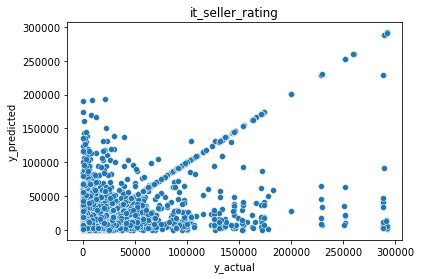

In [29]:
sns.scatterplot(x = y_actual, y = y_predicted)
plt.xlabel('y_actual')
plt.ylabel('y_predicted')
plt.title('it_seller_rating')

plt.show()

In [30]:
tab_one_column = []
for i in range(10):
    tab_one_column.append(insert_nans_and_impute_one_column(dfX, False))

tab_one_column = np.array(tab_one_column)

In [31]:
print(f'Średna wartość błędu średniokwadratowego wynosi: {tab_one_column.mean():.2f}, natomiast odchylenie standardowe: {tab_one_column.std():.2f}')

Średna wartość błędu średniokwadratowego wynosi: 32075.56, natomiast odchylenie standardowe: 1153.91


W przypadku imputowania jednej kolumny rozkład zmiennej zmienił się nieznacznie - jest lekko przesunięty w prawo oraz maksimum jest trochę wyższe.

Na scatterplocie, którego celem było porównanie prawdziwej oraz wyliczonej wartości zmiennych, widać linię prostą, jednak większość obserwacji znajduje się bliżej lewego dolnego rogu wykresu. Ponadto, imputer nie poradził sobie z dużymi wartościami - np. dla prawdziwej wartości w okolicy 200000-300000, sporo obserwacji jest poniżej 100000,

### Dwie kolumny

In [32]:
def insert_nans_and_impute_two_columns(dfX, return_out_df):
    dfXX = dfX.copy()
    dfXX.loc[dfXX.sample(frac = 0.1).index, 'it_seller_rating'] = np.nan
    dfXX.loc[dfXX.sample(frac = 0.1).index, 'it_quantity'] = np.nan
    
    from sklearn.impute import KNNImputer
    
    imputer = KNNImputer(n_neighbors=5, weights= "distance")
    out = imputer.fit_transform(dfXX)
    
    from sklearn.metrics import mean_squared_error
    
    vec = dfXX.it_seller_rating.isna()

    rms = mean_squared_error(dfX['it_seller_rating'][vec], out[vec, 1], squared=False)
    
    if not return_out_df:
        return rms
    else:
        y_actual = dfX.loc[vec.to_numpy(), ['it_seller_rating', 'it_quantity']].to_numpy()
        y_predicted = out[vec, :]
        y_predicted = y_predicted[:, [1, 2]]
        
        return rms, y_actual, y_predicted

In [33]:
# pojedyncza próba

insert_nans_and_impute_two_columns(dfX, False)

37406.88243445565

In [34]:
# pojedyncza próba wraz z wynikami

rms, y_actual, y_predicted = insert_nans_and_impute_two_columns(dfX, True)

In [35]:
y_actual_df = pd.DataFrame(y_actual)
y_actual_df.columns = ['y1', 'y2']

y_actual_df['type'] = 'actual'

In [36]:
y_predicted_df = pd.DataFrame(y_predicted)
y_predicted_df.columns = ['y1', 'y2']

y_predicted_df['type'] = 'predicted'

In [37]:
X = pd.concat([y_actual_df, y_predicted_df])
X.columns = ['it_seller_rating', 'it_quantity', 'type']
X.head()

,it_seller_rating,it_quantity,type
0,39371.0,742.0,actual
1,4287.0,886.0,actual
2,5235.0,986.0,actual
3,11542.0,719.0,actual
4,11361.0,208.0,actual


Porównanie rozkładów danych, które zostały usunięte oraz danych imputowanych

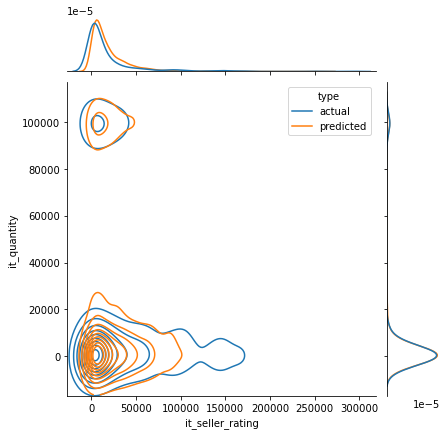

In [38]:
sns.jointplot(data = X, x = 'it_seller_rating', y = 'it_quantity', hue = 'type', kind = 'kde')

plt.show()

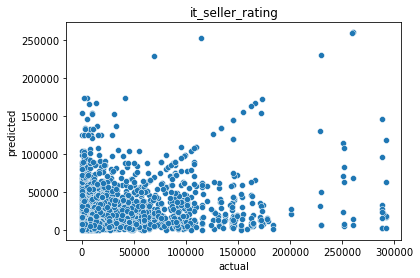

In [39]:
sns.scatterplot(x = X[X.type == 'actual'].it_seller_rating, y = X[X.type == 'predicted'].it_seller_rating)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('it_seller_rating')

plt.show()

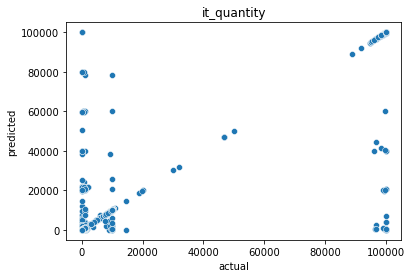

In [40]:
sns.scatterplot(x = X[X.type == 'actual'].it_quantity, y = X[X.type == 'predicted'].it_quantity)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('it_quantity')

plt.show()

In [41]:
tab_two_columns = []
for i in range(10):
    tab_two_columns.append(insert_nans_and_impute_two_columns(dfX, False))

tab_two_columns = np.array(tab_two_columns)

In [42]:
print(f'Średna wartość błędu średniokwadratowego wynosi: {tab_two_columns.mean():.2f}, natomiast odchylenie standardowe: {tab_two_columns.std():.2f}')

Średna wartość błędu średniokwadratowego wynosi: 36856.74, natomiast odchylenie standardowe: 662.02


W przypadku braku dwóch kolumn, błąd średniokwadratowy okazał się jeszcze większy, natomiast odchylenie standardowe mniejsze.

Wynikowe rozkłady wyglądają gorzej niż w przypadku jednej kolumny. Obserwacje w przypadku kolumny *it_seller_rating* nadal są rozłożone bliżej lewego dolnego rogu wykresu, jednak linia prosta (która wskazuje poprawne wyniki) jest mniej "wypełniona" niż w przypadku poprzedniego eksperymentu. Ponadto, żadna obserwacja nie została imputowana wartością powyżej 300000. Jeśli chodzi o kolumnę *it_quantity* widać wyraźną linię prostą i wydaje się, że została ona dość dobrze zimputowana.

### Podsumowanie

Narzędzia do automatycznej imputacji są wygodne w użyciu, jednak w tym przypadku prowadzą do bardzo dużych błędów. Przyjrzyjmy się, jak różniły się błędy w przypadku imputowania jednej oraz dwóch kolumn.

In [43]:
tab_one_column_df = pd.DataFrame(tab_one_column)
tab_one_column_df.columns = ['val']
tab_one_column_df['type'] = 'one column'

tab_two_columns_df = pd.DataFrame(tab_two_columns)
tab_two_columns_df.columns = ['val']
tab_two_columns_df['type'] = 'two columns'

X = pd.concat([tab_one_column_df, tab_two_columns_df])
X.columns = ['val', 'type']
X.head()

,val,type
0,31519.915157,one column
1,31570.447439,one column
2,33501.396107,one column
3,31714.282812,one column
4,30266.006865,one column


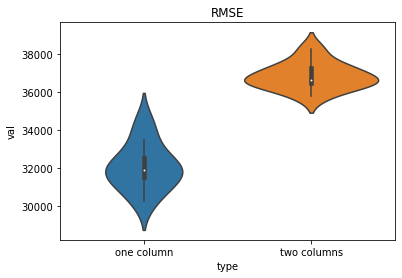

In [44]:
sns.violinplot(data = X, y = 'val', x = 'type')
plt.title('RMSE')

plt.show()

Błąd RMSE jest w większy w przypadku imputowania dwóch kolumn. 

Ponadto, błędy te mają inne rozkłady - błędy przy imputacji jednej kolumny są bardziej rozrzucone, podczas gdy w przypadku dwóch kolumn wartości błędów rozłożone są bliżej średniej (jednak ta średnia jest wyższa niż w przypadki pierwszego przypadku).